<!--BOOK_INFORMATION-->
<a href="https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv" target="_blank"><img align="left" src="data/cover.jpg" style="width: 76px; height: 100px; background: white; padding: 1px; border: 1px solid black; margin-right:10px;"></a>
*This notebook contains an excerpt from the book [Machine Learning for OpenCV](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv) by Michael Beyeler.
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv)!*

<!--NAVIGATION-->
< [Detecting Pedestrians with Support Vector Machines](06.00-Detecting-Pedestrians-with-Support-Vector-Machines.ipynb) | [Contents](../README.md) | [Detecting Pedestrians in the Wild](06.02-Detecting-Pedestrians-in-the-Wild.ipynb) >

http://revistas.udistrital.edu.co/ojs/index.php/reving/article/view/3855/5688
http://cvn.ecp.fr/personnel/iasonas/course/Lecture_4.pdf

# Implementing Your First Support Vector Machine

## Generating the dataset

In [1]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=100, n_features=2,
                                    n_redundant=0, n_classes=2,
                                    random_state=7816)

In [2]:
X.shape, y.shape

((100, 2), (100,))

## Visualizing the dataset

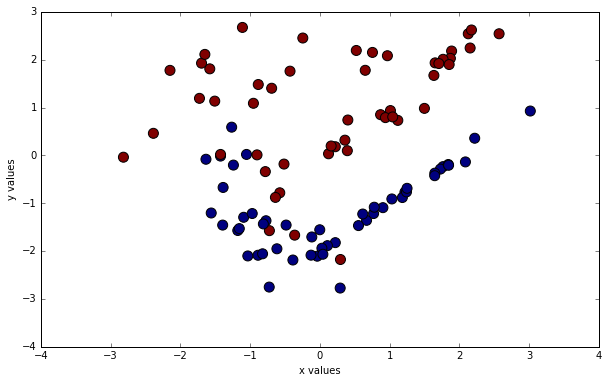

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y values')

## Preprocessing the dataset

In [4]:
import numpy as np
X = X.astype(np.float32)
y = y * 2 - 1

In [5]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

## Building the support vector machine

In [6]:
import cv2
svm = cv2.ml.SVM_create()

In [7]:
svm.setKernel(cv2.ml.SVM_LINEAR)

In [8]:
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [9]:
_, y_pred = svm.predict(X_test)

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.80000000000000004

## Visualizing the decision boundary

In [11]:
def plot_decision_boundary(svm, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    _, zz = svm.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

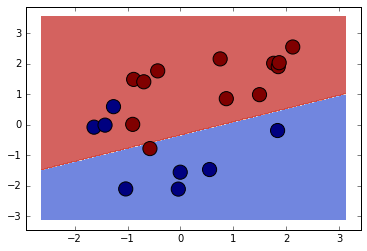

In [12]:
plot_decision_boundary(svm, X_test, y_test)

# Dealing with nonlinear decision boundaries

## Implementing nonlinear support vector machines

In [13]:
kernels = [cv2.ml.SVM_LINEAR, cv2.ml.SVM_INTER, cv2.ml.SVM_SIGMOID, cv2.ml.SVM_RBF]

In [14]:
svm.setType(cv2.ml.SVM_C_SVC)

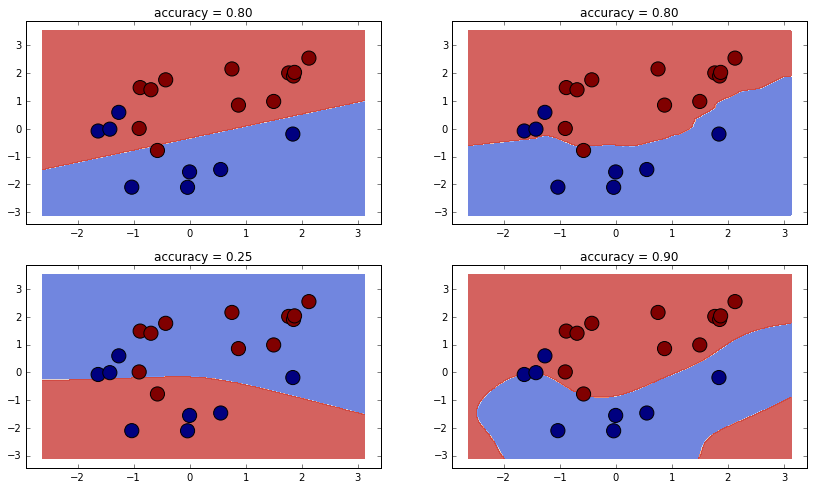

In [15]:
plt.figure(figsize=(14, 8))
for idx, kernel in enumerate(kernels):
    svm = cv2.ml.SVM_create()
    svm.setKernel(kernel)
    svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
    _, y_pred = svm.predict(X_test)
    
    plt.subplot(2, 2, idx + 1)
    plot_decision_boundary(svm, X_test, y_test)
    plt.title('accuracy = %.2f' % metrics.accuracy_score(y_test, y_pred))
plt.savefig('svm-all.png')

<!--NAVIGATION-->
< [Detecting Pedestrians with Support Vector Machines](06.00-Detecting-Pedestrians-with-Support-Vector-Machines.ipynb) | [Contents](../README.md) | [Detecting Pedestrians in the Wild](06.02-Detecting-Pedestrians-in-the-Wild.ipynb) >